Introduction to PMFs
====================

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [1]:
# this line makes the code compatible with Python 2 and 3
from __future__ import print_function, division

# this line makes Jupyter show figures in the notebook
%matplotlib inline

## Hist objects

A histogram is a map from each possible value to the number of times it appears.  A map can be a mathematical function or, as in the examples below, a Python data structure that provides the ability to look up a value and get its probability.

`Counter` is a data structure provided by Python; I am defining a new data structure, called a `Hist`, that has all the features of a Counter, plus a few more that I define.

In [2]:
import random
import matplotlib.pyplot as plt
from collections import Counter
from itertools import izip

class Hist(Counter):
    
    def __add__(self, other):
        """Returns the Pmf of the sum of elements from self and other."""
        return Hist(x + y for x, y in product(self.elements(), other.elements()))
    
    def choice(self):
        """Chooses a random element."""
        return random.choice(list(self.elements()))
    
    def plot(self, **options):
        """Plots the Pmf."""
        plt.bar(*zip(*self.items()), **options)
        plt.xlabel('Values')
        plt.ylabel('Counts')
    
    def ranks(self):
        """Returns ranks and counts as lists."""
        return izip(*enumerate(sorted(self.values(), reverse=True)))

As an example, I'll make a Hist of the letters in my name:

In [3]:
hist = Hist('allen')
hist

Hist({'a': 1, 'e': 1, 'l': 2, 'n': 1})

We can look up a letter and get the corresponding count:

In [4]:
hist['l']

2

Or loop through all the letters and print their counts:

In [5]:
for letter in hist:
    print(letter, hist[letter])

a 1
e 1
l 2
n 1


`Counter` provides `most_common`, which makes a list of (element, count) pairs:

In [6]:
hist.most_common()

[('l', 2), ('a', 1), ('e', 1), ('n', 1)]

Here they are in a more readable form:

In [7]:
for letter, count in hist.most_common():
    print(letter, count)

l 2
a 1
e 1
n 1


I defined `choice`, which returns a random element from the Hist.  On average, 'l' should appear twice as often as the other letters.

In [8]:
for i in range(10):
    print(hist.choice())

a
a
e
a
e
n
l
l
l
l


One (perhaps surprising) thing you can use Hists for: checking whether two words are anagrams of each  other.  If two words are anagrams, they have the same Hist: 

In [9]:
def is_anagram(word1, word2):
    return Hist(word1) == Hist(word2)

Here's a simple test:

In [10]:
is_anagram('allen', 'nella')

True

And my favorite anagram pair:

In [11]:
is_anagram('tachymetric', 'mccarthyite')

True

And here's a false one, just to make sure:

In [12]:
is_anagram('abcd', 'abccd')

False

So far the elements in the Hists have been letters (actually strings), but in statistics it is more common to work with numerical elements.  Here's a Hist that represents the possible outcomes of a six-sided die:

In [13]:
d6 = Hist([1,2,3,4,5,6])
d6

Hist({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1})

`Hist` provides a plot function:

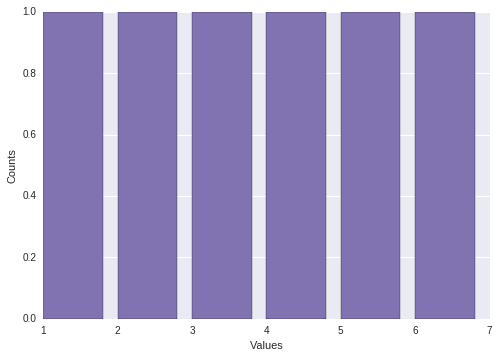

In [14]:
import seaborn as sns
COLORS = sns.color_palette()

d6.plot(color=COLORS[3])

`elements` returns an iterator

In [15]:
d6.elements()

Which is easier to see if you convert to a list:

In [16]:
list(d6.elements())

[1, 2, 3, 4, 5, 6]

The product of two iterators is an iterator that enumerates all pairs:

In [17]:
from itertools import product

product(d6.elements(), d6.elements())

Here are the elements of the product:

In [18]:
list(product(d6.elements(), d6.elements()))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

Now we can compute the sum of all pairs:

In [19]:
list(x + y for x, y in product(d6.elements(), d6.elements()))

[2,
 3,
 4,
 5,
 6,
 7,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 5,
 6,
 7,
 8,
 9,
 5,
 6,
 7,
 8,
 9,
 10,
 6,
 7,
 8,
 9,
 10,
 11,
 7,
 8,
 9,
 10,
 11,
 12]

And finally make a Hist of the sums:

In [20]:
Hist(x + y for x, y in product(d6.elements(), d6.elements()))

Hist({2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1})

But all of that is provided by `__add__`, which we can call using the `+` operator:

In [21]:
twice = d6 + d6
twice

Hist({2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1})

Now we can plot the histogram of outcomes from rolling two dice:

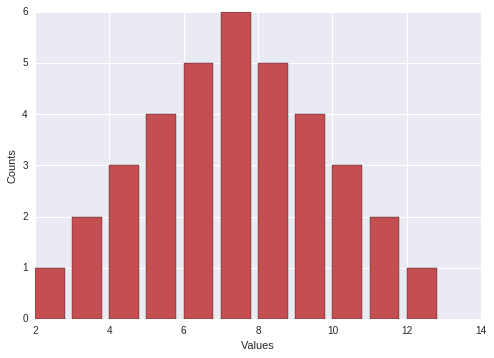

In [22]:
twice.plot(color=COLORS[2])

Or three dice:

In [23]:
thrice = twice + d6
thrice

Hist({3: 1,
      4: 3,
      5: 6,
      6: 10,
      7: 15,
      8: 21,
      9: 25,
      10: 27,
      11: 27,
      12: 25,
      13: 21,
      14: 15,
      15: 10,
      16: 6,
      17: 3,
      18: 1})

Notice that this is looking more and more like a bell curve:

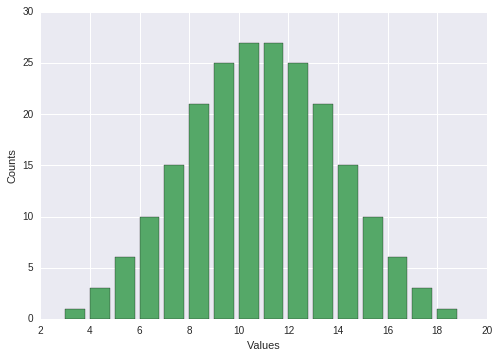

In [24]:
thrice.plot(color=COLORS[1])

As the number of dice increases, the result converges to a normal distribution, also known as a Gaussian distribution.

Are first babies more likely to be late?
----------------------------------------

This is one of the first topics I wrote about in my blog, and still the most popular, with more than 100,000 page views:

http://allendowney.blogspot.com/2011/02/are-first-babies-more-likely-to-be-late.html

I used data from the National Survey of Family Growth (NSFG):



In [25]:
import thinkstats2

dct_file = '2002FemPreg.dct'
dat_file = '2002FemPreg.dat.gz'

dct = thinkstats2.ReadStataDct(dct_file)
preg = dct.ReadFixedWidth(dat_file, compression='gzip')

preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,3410.389399,3869.349602,6448.271112,2,9,1231
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,0,7226.301740,8567.549110,12999.542264,2,12,1231


The variable `outcome` encodes the outcome of the pregnancy.  Outcome 1 is a live birth.

In [26]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

`pregorder` is 1 for first pregnancies, 2 for others.

In [27]:
preg.pregordr.value_counts().sort_index()

1     5033
2     3766
3     2334
4     1224
5      613
6      308
7      158
8       78
9       38
10      17
11       8
12       5
13       3
14       3
15       1
16       1
17       1
18       1
19       1
Name: pregordr, dtype: int64

I selected live births, then split into first babies and others.

In [28]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
len(firsts), len(others)

(4413, 4735)

The mean pregnancy lengths are slightly different:

In [29]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

The difference is 0.078 weeks:

In [30]:
diff = firsts.prglngth.mean() - others.prglngth.mean()
diff

0.07803726677754952

Which is 13 hours.  Note: the best units to report are often not the units you computed.

In [31]:
diff * 7 * 24

13.11026081862832

Let's see if we can visualize the difference in the histograms:

In [32]:
first_hist = Hist(firsts.prglngth)
other_hist = Hist(others.prglngth)

I used some plotting options to put two bar charts side-by-side:

In [33]:
def plot_distributions(dist1, dist2):
    dist1.plot(width=-0.45, align='edge', color=COLORS[3], label='firsts')
    dist2.plot(width=0.45, align='edge', color=COLORS[4], label='others')
    plt.xlim(33.5, 43.5)
    plt.legend()

Here are the two histograms:

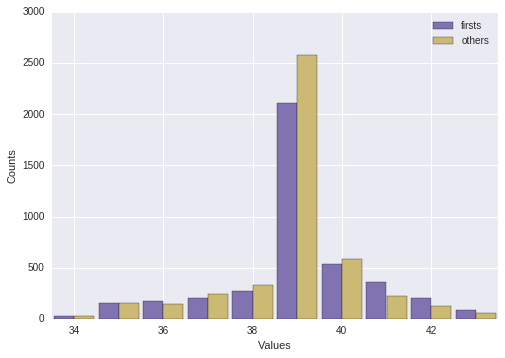

In [34]:
plot_distributions(first_hist, other_hist)

Remember that the vertical axis is counts.  In this case, we are comparing counts with different totals, which might be misleading.

An alternative is to compute a probability mass function (PMF), which divides the counts by the totals, yielding a map from each element to its probability.

The probabilities are "normalized" to add up to 1.


In [35]:
import numpy as np

class Pmf(Hist):
    
    def normalize(self):
        total = sum(self.values())
        for element in self:
            self[element] /= total
        return self
    
    def plot_cumulative(self, **options):
        xs, ps = zip(*sorted(self.iteritems()))
        cs = np.cumsum(ps, dtype=np.float)
        cs /= cs[-1]
        plt.plot(xs, cs, **options)

Now we can compare PMFs fairly.

In [36]:
first_pmf = Pmf(firsts.prglngth).normalize()
other_pmf = Pmf(others.prglngth).normalize()

Using PMFs, we see that some of the difference at 39 weeks was an artifact of the different samples sizes:

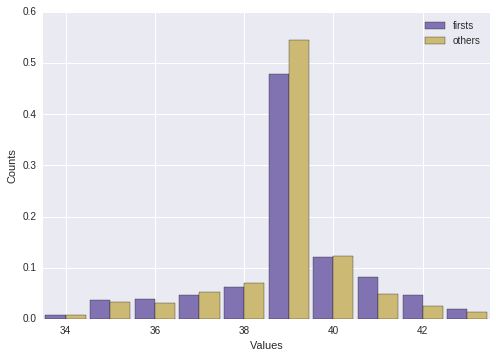

In [37]:
plot_distributions(first_pmf, other_pmf)

Even so, it is not easy to compare PMFs.  One more alternative is the cumulative mass function (CMF), which shows, for each $t$, the total probability up to and including $t$.

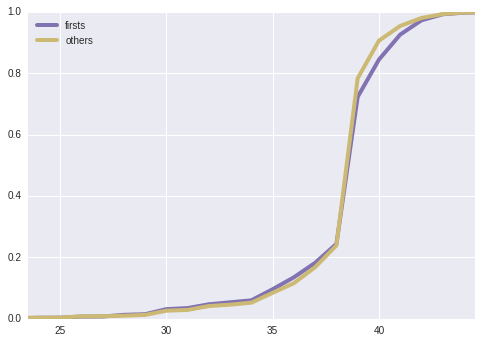

In [38]:
first_pmf.plot_cumulative(linewidth=4, color=COLORS[3], label='firsts')
other_pmf.plot_cumulative(linewidth=4, color=COLORS[4], label='others')
plt.xlim(23.5, 44.5)
plt.legend(loc='upper left')

The CDFs are similar up to week 38.  After that, first babies are more likely to be born late.

Note: don't be afraid of thick lines.  Differences that are only visible with thin lines are unlikely to be real.



Word Frequencies
----------------

Next topic: let's look at histograms of words, bigrams and trigrams.

The following function reads lines from a file or URL and splits them into words:

In [39]:
def iterate_words(filename):
    """Read lines from a file and split them into words."""
    for line in open(filename):
        for word in line.split():
            yield word.strip()

Here's an example using a book from Project Gutenberg.  `wc` is a histogram of word counts:

In [40]:
# FAIRY TALES
# By The Brothers Grimm
# http://www.gutenberg.org/cache/epub/2591/pg2591.txt'
wc = Hist(iterate_words('pg2591.txt'))

Here are the 20 most common words:

In [41]:
wc.most_common(20)

[('the', 6507),
 ('and', 5250),
 ('to', 2707),
 ('a', 1932),
 ('he', 1817),
 ('of', 1450),
 ('was', 1337),
 ('in', 1080),
 ('she', 1049),
 ('that', 1021),
 ('his', 1014),
 ('you', 941),
 ('it', 881),
 ('her', 880),
 ('had', 827),
 ('I', 755),
 ('they', 751),
 ('for', 721),
 ('with', 720),
 ('as', 718)]

Word frequencies in natural languages follow a predictable pattern called Zipf's law (which is an instance of Stigler's law, which is also an instance of Stigler's law).

We can see the pattern by lining up the words in descending order of frequency and plotting their ranks (1st, 2nd, 3rd, ...) versus counts (6507, 5250, 2707):

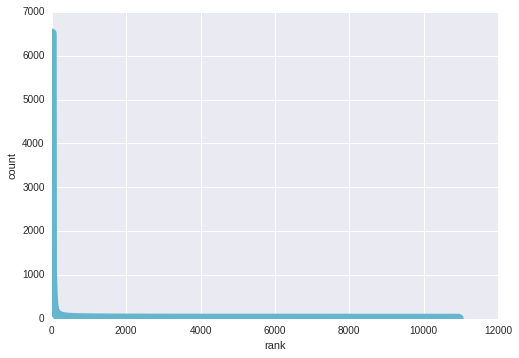

In [42]:
ranks, counts = wc.ranks()
plt.plot(ranks, counts, linewidth=10, color=COLORS[5])
plt.xlabel('rank')
plt.ylabel('count')

Huh.  Maybe that's not so clear after all.  The problem is that the counts drop off very quickly.  If we use the highest count to scale the figure, most of the other counts are indistinguishable from zero.

Also, there are more than 10,000 words, but most of them appear only a few times, so we are wasting most of the space in the figure in a regime where nothing is happening.

This kind of thing happens a lot.  A common way to deal with it is to compute the log of the quantities or to plot them on a log scale:

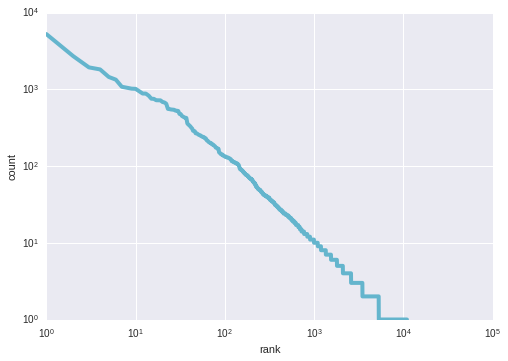

In [43]:
ranks, counts = wc.ranks()
plt.plot(ranks, counts, linewidth=4, color=COLORS[5])
plt.xlabel('rank')
plt.ylabel('count')
plt.xscale('log')
plt.yscale('log')

This (approximately) straight line is characteristic of Zipf's law.

n-grams
-------

On to the next topic: bigrams and trigrams.

In [44]:
from itertools import tee

def pairwise(iterator):
    """Iterates through a sequence in overlapping pairs.
    
    If the sequence is 1, 2, 3, the result is (1, 2), (2, 3), (3, 4), etc.
    """
    a, b = tee(iterator)
    next(b, None)
    return izip(a, b)

`bigrams` is the histogram of word pairs:

In [45]:
bigrams = Hist(pairwise(iterate_words('pg2591.txt')))

And here are the 20 most common:

In [46]:
bigrams.most_common(20)

[(('to', 'the'), 444),
 (('in', 'the'), 399),
 (('of', 'the'), 369),
 (('and', 'the'), 349),
 (('into', 'the'), 294),
 (('said', 'the'), 251),
 (('on', 'the'), 199),
 (('and', 'when'), 168),
 (('he', 'was'), 164),
 (('he', 'had'), 164),
 (('to', 'be'), 163),
 (('it', 'was'), 152),
 (('Then', 'the'), 151),
 (('I', 'will'), 149),
 (('that', 'he'), 143),
 (('at', 'the'), 142),
 (('came', 'to'), 138),
 (('and', 'he'), 135),
 (('she', 'was'), 129),
 (('all', 'the'), 125)]

Similarly, we can iterate the trigrams:

In [47]:
def triplewise(iterator):
    a, b, c = tee(iterator, 3)
    next(b)
    next(c)
    next(c)
    return izip(a, b, c)

And make a histogram:

In [48]:
trigrams = Hist(triplewise(iterate_words('pg2591.txt')))

# Uncomment this line to run the analysis with Elvis Presley lyrics
#trigrams = Hist(triplewise(iterate_words('lyrics-elvis-presley.txt')))

Here are the 20 most common:

In [49]:
trigrams.most_common(20)

[(('came', 'to', 'the'), 65),
 (('and', 'when', 'he'), 50),
 (('out', 'of', 'the'), 50),
 (('said', 'to', 'the'), 34),
 (('he', 'came', 'to'), 33),
 (('and', 'when', 'she'), 33),
 (('went', 'into', 'the'), 32),
 (('went', 'to', 'the'), 31),
 (('and', 'said', 'to'), 31),
 (('came', 'to', 'a'), 30),
 (('one', 'of', 'the'), 30),
 (('and', 'as', 'he'), 29),
 (('they', 'came', 'to'), 29),
 (('he', 'did', 'not'), 28),
 (('there', 'was', 'a'), 28),
 (('that', 'he', 'had'), 28),
 (('and', 'I', 'will'), 27),
 (('that', 'it', 'was'), 25),
 (('and', 'at', 'last'), 24),
 (('and', 'when', 'the'), 24)]

And now for a little fun.  I'll make a dictionary that maps from each word pair to a Hist of the words that can follow.

In [50]:
from collections import defaultdict

d = defaultdict(Hist)
for a, b, c in trigrams:
    d[a, b][c] += trigrams[a, b, c]

Now we can look up a pair and see what might come next:

In [51]:
d['the', 'blood']

Hist({'came,': 1,
      'fell': 1,
      'might': 1,
      'of': 2,
      'on': 1,
      'ran': 2,
      'ran.': 1,
      'streamed': 1,
      'that': 1})

Here are the most common words that follow "into the":

In [52]:
d['into', 'the'].most_common(10)

[('forest', 15),
 ('forest,', 13),
 ('garden', 9),
 ('kitchen,', 8),
 ('cellar', 8),
 ('room,', 7),
 ('wide', 7),
 ('water,', 7),
 ('wood', 6),
 ('kitchen', 6)]

Here are the words that follow "said the":

In [53]:
d['said', 'the'].most_common(10)

[('old', 13),
 ('man,', 12),
 ('little', 10),
 ('fisherman,', 8),
 ('father,', 7),
 ('ass,', 6),
 ('tailor,', 5),
 ('wife,', 5),
 ('fish;', 5),
 ('other;', 5)]

`Hist` provides `choice`, which chooses a random word with probability proportional to count:

In [54]:
d['said', 'the'].choice()

'wife,'

Given a prefix, we can choose a random suffix:

In [55]:
prefix = 'said', 'the'
suffix = d[prefix].choice()
suffix

'sparrow;'

Then we can shift the words and compute the next prefix:

In [56]:
prefix = prefix[1], suffix
prefix

('the', 'sparrow;')

Repeating this process, we can generate random new text that has the same correlation structure between words as the original:

In [57]:
for i in range(100):
    suffix = d[prefix].choice()
    print(suffix, end=' ')
    prefix = prefix[1], suffix

but killed his horse with his finger, and three times with the sack of pearls and precious stones for his wife, being awakened by the hand up to her, 'Take us out, or alas! we shall see what sort of game lies there.' And the king all that had been with the assistance they need, is critical to reaching Project Gutenberg-tm's goals and ensuring that the wife was not dead, but had been made to fetch this ring up from the gate,' as if it cost what it is said that it was the wolf, who lived in great comfort, 

With a prefix of two words, we typically get text that flirts with sensibility.